## Dicrete Fourier Transformation
On computers and various kinds of media players, the sound is digital, meaning that it is represented by a large number of function values, and not by a function defined for all time instances.
In this chapter our starting point is simply a vector which represents the sound values, rather than a function f (t).

In [144]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Interact with Jupyter notebooks, e.g. show sliders
# See https://doc.sagemath.org/html/en/reference/repl/sage/repl/ipython_kernel/interact.html
# from sage.repl.ipython_kernel.interact import interact

# Play audio samples in a Jupyter Notebook
from IPython.display import Audio

# Digital Sound and inner product

Now we will parallel the developments we did for Fourier series, assuming instead that vectors (rather than functions) are involved. As with Fourier series we will assume that the vector is periodic. This means that we can represent it with the values from only the first period.

<link rel="stylesheet" href="./styles.css">
<div class="def">

<strong>Definition (Ryan, 2.1). Digital sound.</strong>

A digital sound is a sequence $\mathbf{x} = \{ x_i \}_{i=0}^{N-1}$ that corresponds to measurements of the air pressure of a sound $f$, recorded at a fixed rate of $f_s$ (sampling rate) measurements per second, i.e.,
$$
x_k = f\left(\frac{k}{f_s}\right), \quad \text{for } k = 0, 1, \ldots, N.
$$

<br>
</div>


In Sage, a sound is consequently an array which coefficients represent the measured air pressure at a given time. We can vary the sample rate by using the @interact-function. In the following coding example we created a square sound (with Frequency $f$ = 1) and plottet its real sound function in comparison to the discrete sound samples. 

In [145]:
@interact
def _(fs=slider(1,100,1)): # Sample Rate 
    def square(t): #Square Sound
        return sgn(np.sin(2 * np.pi * f * t))
    t = np.arange(0, 3, 1/fs)  # Discrete Samples
    f = 1  # Frequency (Hz)
    x = square(t) # Sinussignal
    t_linspace = np.linspace(0, 3, 1000) # x-Axis 
    plt.plot(t_linspace, square(t_linspace), color = "grey") #plot sound function 
    plt.scatter(t, x) #plot discrete samples

    #display(Audio(x, rate=fs)) Warum geht das hier nicht? 

Interactive function <function _ at 0x156faad40> with 1 widget
  fs: TransformIntSlider(value=1, description='fs', min=1)

Most of the time we don´t know the sound function, we just measured the air pressure. Vectors than contain this information are called wav-files. Instead of creating our own sound with sine, we can just import any sound as a .wav-file. The file contains a header with additional information about the sound, f.e. sample rate and channels, and a data-part which contains the air pressure values for each sample. 

In [146]:
sample_rate, wav_data = wavfile.read('../data/sounds/square.wav')
display(Audio(wav_data, rate=sample_rate))

<link rel="stylesheet" href="./styles.css">
<div class="def">

<strong>Definition (Ryan, 2.11).
Euclidean inner product and norm for complex vectors.</strong>

For complex vectors of length $N$, the Euclidean inner product is given by
$$\langle x, y \rangle = \sum_{k=0}^{N-1} x_k \overline{y_k}.$$

The associated norm is
$$\|x\| = \left( \sum_{k=0}^{N-1} |x_k|^2 \right)^{1/2}.$$

<br>
</div>

In the previous chapter we saw that, using a Fourier series, a function with period
T could be approximated by linear combinations of the the pure tones. This can be generalised to vectors, but then the pure tones must of course also be vectors.

<link rel="stylesheet" href="./styles.css">
<div class="def">

<strong>Definition (Ryan, 2.12). Discrete Fourier analysis.</strong>

In Discrete Fourier analysis, a vector $\mathbf{x} = (x_0, \ldots, x_{N-1})$ is represented as a linear combination of the $N$ vectors
$$
\varphi_n = \frac{1}{\sqrt{N}} \left(1, e^{2\pi i n / N}, e^{2\pi i 2n / N}, \ldots, e^{2\pi i kn / N}, \ldots, e^{2\pi i n (N-1) / N} \right).
$$
The whole collection $\mathcal{F}_N = \{ \varphi_n \}_{n=0}^{N-1}$ is called the $N$-point Fourier basis.

<br>
</div>


The focus in Discrete Fourier analysis is to change coordinates from the standard basis to the Fourier basis

<link rel="stylesheet" href="./styles.css">
<div class="theorem">

<strong>Theorem (Ryan, 2.14/2.16). Discrete Fourier Transform.</strong>

We will denote the change of coordinates matrix from the standard basis of $\mathbb{R}^N$ to the Fourier basis $\mathcal{F}_N$ by $F_N$. The Fourier matrix $F_N$ is the unitary $N \times N$ matrix with entries given by
$$
(F_N)_{nk} = \frac{1}{\sqrt{N}} e^{-2\pi i nk / N},
$$
for $0 \le n, k \le N - 1$.
The matrix ${\sqrt{N}}F_N$ is also called the (N-point) discrete Fourier transform, or DFT

<br>
</div>


In Sagemath, we calculate the Discrete Fourier Transformation by following function: 

In [147]:
#DFT 
def dft(x):
    N = len(x) # Amount of Signals measured
    n = np.arange(N) # Vector of increasing natural Numbers from 0 to N-1
    k = n.reshape((N, 1)) # Transpose n; k is N x 1 vector
    M = -2 * i * np.pi * k * n / N # Symmetric N x N - Matrix 
    F_N = np.exp(M) # Calculate DFT-Matrix Coefficients
    
    return np.dot(F_N, x) # Matrix multiplication.

<link rel="stylesheet" href="./styles.css">
<div class="theorem">

<strong> (Ryan, 2.17). Inverse Discrete Fourier Transform.</strong>

The Matrix $F_N$ is invertable. Its coeffiecients can be computed from
$$
(F_N^{-1})_{nk} = {\sqrt{N}} e^{2\pi i nk / N}
$$

Tha matrix $\frac{1}{\sqrt{N}}F_N^{-1}$ is called Inverse Discrete Fourier Transform , or IDFT.

<br>
</div>

The implementation of the IDFT ist basically the same as the DFT.

In [148]:
#Inverse DFT 
def idft(x):
    N = len(x) # Amount of Signals measured
    n = np.arange(N) # Vector of increasing natural Numbers from 0 to N
    k = n.reshape((N, 1)) # Transpose n; k is N x 1 vector
    M = 2 * i * np.pi * k * n / N # Symmetric N x N - Matrix 
    F_Ninv = np.exp(M) 

    return np.dot(F_Ninv, x) # Matrix multiplication.

<link rel="stylesheet" href="./styles.css">
<div class="theorem">

<strong>Proposition (Ryan, 2.24). Relation between Fourier coefficients and DFT coefficients.</strong>

Let $N > 2M$, $f \in V_{M,T}$, and let $\mathbf{x} = \{ f(kT/N) \}_{k=0}^{N-1}$ be $N$ uniform samples from $f$ over $[0, T]$. The Fourier coefficients $z_n$ of $f$ can be computed from
$$
(z_0, z_1, \ldots, z_M, 0, \ldots, 0, z_{-M}, z_{-M+1}, \ldots, z_{-1}) = \frac{1}{N} \text{DFT}_N \mathbf{x}. \quad (2.7)
$$

<br>
</div>


We can test this by performing the DFT on the square-sound and compare the results.

In [149]:
def square(t): #Square Sound
        return sgn(np.sin(2 * np.pi * f * t))
fs = 1000
t = np.arange(0, 3, 1/fs)  # Discrete Samples
f = 1  # Frequency (Hz)
x = square(t) # Sinussignal


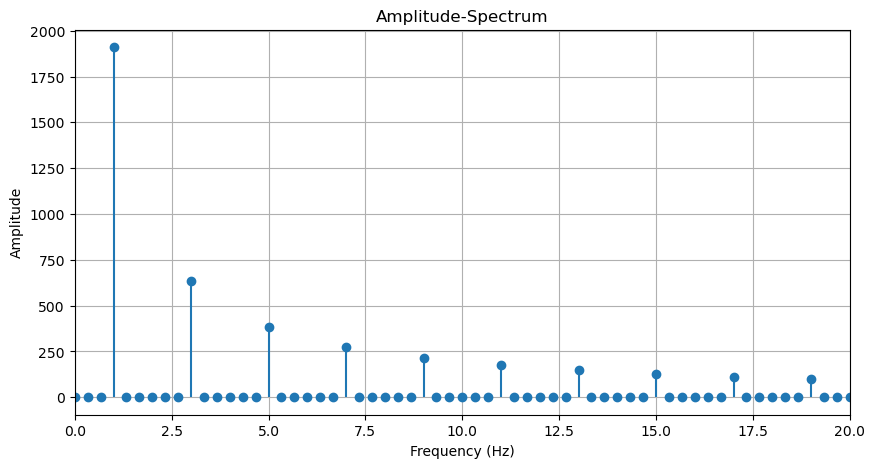

In [150]:
dft_x = dft(x)  # DFT des Signals

# Y - Axis: Amplitude-Spectrum
amplitude_spectrum = np.abs(dft_x) 

# X-Axis: Frequencies
freq_own = np.arange(0, 0.5 * fs, fs/len(x))

# Plot Amplitude-Spectrum
plt.figure(figsize=(10, 5))
plt.stem(freq_own, amplitude_spectrum[:len(freq_own)], basefmt=" ")
plt.title('Amplitude-Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0,20)
plt.show()

As we can see, the Frequency-Spectrum is the same. Now we perform the IDFT. Because of rounding errors we have to round the result of the IDFT to 5 decimal places. 

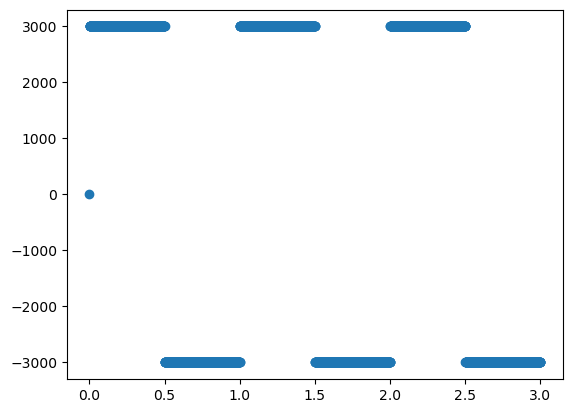

In [151]:
# Inverse DFT
idft_x = idft(dft_x)

# Delelte Rounding Errors
rounded_idft_x = np.around(np.real(idft_x), 5) 

#Plot Sound
t_linspace = np.linspace(0, 3, 1000) 
plt.scatter(t, rounded_idft_x) 

#Hear Sound
display(Audio(rounded_idft_x, rate=sample_rate))


# Sound Filter

Now, where we can find out the frequency spectrum of each sound, we can implement our equalizer. In our case, we want to implement a lowpass filter, which extracts frequencies higher than a so called "cutoff frequency" of a sound. As we know now, this shouldn´t be much more than simply setting the amplitudes of higher frequencies to zero. 

In [152]:
@interact
def _(cutoff_freq = slider(0,500,1, default = 500)):
    N = len(dft_x)
    dft_x[cutoff_freq+1:N-cutoff_freq] = zero_vector(N - 2*cutoff_freq - 1)

    amplitude_spectrum = np.abs(filtered_x) 

    # Scale X-Axis
    freq_own = np.arange(0, 0.5 * fs, fs/len(x))

    # Plot Amplitude-Spectrum
    plt.figure(figsize=(10, 5))
    plt.stem(freq_own, amplitude_spectrum[:len(freq_own)], basefmt=" ")
    plt.title('Amplitude-Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim()
    plt.show()


Interactive function <function _ at 0x15701de40> with 1 widget
  cutoff_freq: TransformIntSlider(value=500, description='cutoff_freq', max=500)

# Hear Filter 


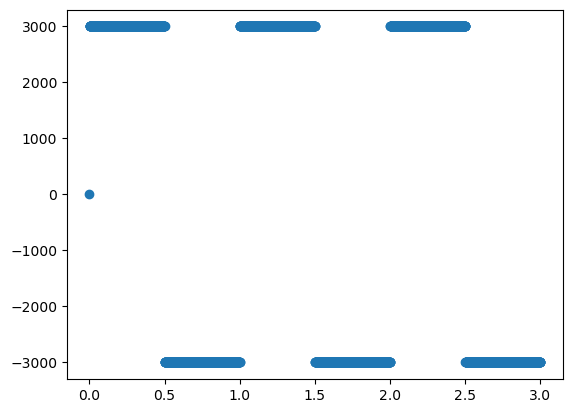

In [153]:
#Fitler
N = len(dft_x)
cutoff_freq = 20
dft_x[cutoff_freq+1:N-cutoff_freq] = zero_vector(N - 2*cutoff_freq - 1)

# Inverse DFT
idft_x = idft(dft_x)

# Delelte Rounding Errors
filtered_x = np.around(np.real(idft_x), 5) 

#Plot Sound
t_linspace = np.linspace(0, 3, 1000) 
plt.scatter(t, rounded_idft_x) 

#Hear Sound 
display(Audio(filtered_x, rate=sample_rate))
